# Exploração e Visualização das Taxas de Incidência
### Parte 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
t = pd.read_csv('../data/processed/rates_per_year_groupby_municipalities.csv', index_col='ibge_code')
municipios = pd.read_csv('../data/interim/municipios/brasil_municipios_reduced.csv')

In [3]:
t.describe().T

,count,mean,std,min,25%,50%,75%,max
2007,144.0,5.334050,13.443405,0.0,0.0,0.0,3.480062,102.063457
2008,144.0,5.804887,13.795226,0.0,0.0,0.0,4.513822,93.900721
2009,144.0,4.140755,11.294541,0.0,0.0,0.0,1.983805,84.679383
2010,144.0,4.263795,10.324262,0.0,0.0,0.0,3.244168,59.450953
2011,144.0,5.153037,13.908245,0.0,0.0,0.0,2.030643,74.359199
2012,144.0,3.672649,10.545971,0.0,0.0,0.0,1.569197,71.210982
2013,144.0,3.433802,9.679399,0.0,0.0,0.0,0.449584,64.926633
2014,144.0,2.878091,9.823871,0.0,0.0,0.0,0.000000,96.349963
2015,144.0,2.988866,10.238112,0.0,0.0,0.0,0.235927,99.013577
2016,144.0,3.623643,9.564412,0.0,0.0,0.0,3.253953,79.611008


In [4]:
municipios.mesorregiao.unique()

array(['Nordeste Paraense', 'Sudeste Paraense', 'Marajó',
       'Baixo Amazonas', 'Sudoeste Paraense', 'Metropolitana de Belém'],
      dtype=object)

Esta é a primeira exploração dos dados de taxa de incidência do estado.

Metodologia: verificar a correlação entre as taxas médias de incidência em diferentes regiões no estado. 
Primeiro uma comparação da evolução anual das mesorregiões. Observa-se que o sudeste teve taxa média maior nos últimos anos. Em seguida, visualiza-se o sudeste a nível de microrregião e o destaque foi a microrregião de Parauapebas. Finalmente, visualiza-se os municípios da microrregião Parauapebas os da microrregião de São Félix.

Foram gerados relatórios utilizando o "ProfileReport", estão em "/reports". Neles é possível verificar a correlação entre os locais.

Método: visualização e manipulação de dados, matplotlib e pandas

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

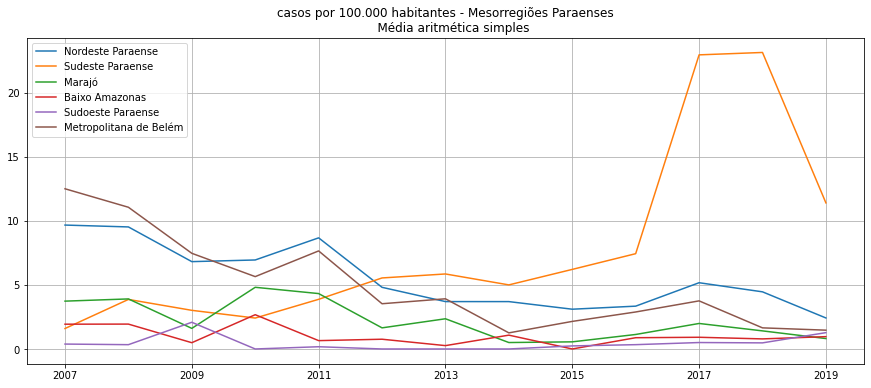

In [5]:
# média aritmética simples anual de cada mesorregião por ano

ne = t.loc[municipios.loc[municipios.mesorregiao == 'Nordeste Paraense', 'ibge_code']].mean()
se = t.loc[municipios.loc[municipios.mesorregiao == 'Sudeste Paraense', 'ibge_code']].mean()                   
marajo = t.loc[municipios.loc[municipios.mesorregiao == 'Marajó', 'ibge_code']].mean()               
baixo_am = t.loc[municipios.loc[municipios.mesorregiao == 'Baixo Amazonas', 'ibge_code']].mean()
so = t.loc[municipios.loc[municipios.mesorregiao == 'Sudoeste Paraense', 'ibge_code']].mean()           
metropolitana = t.loc[municipios.loc[municipios.mesorregiao == 'Metropolitana de Belém', 'ibge_code']].mean()

data = pd.concat([ne, se, marajo, baixo_am, so, metropolitana], axis=1)
data.columns = municipios.mesorregiao.unique()
profile = ProfileReport(data)
profile.to_file("../reports/mesorregiões_report.html")
data.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Mesorregiões Paraenses
    Média aritmética simples'''
);


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

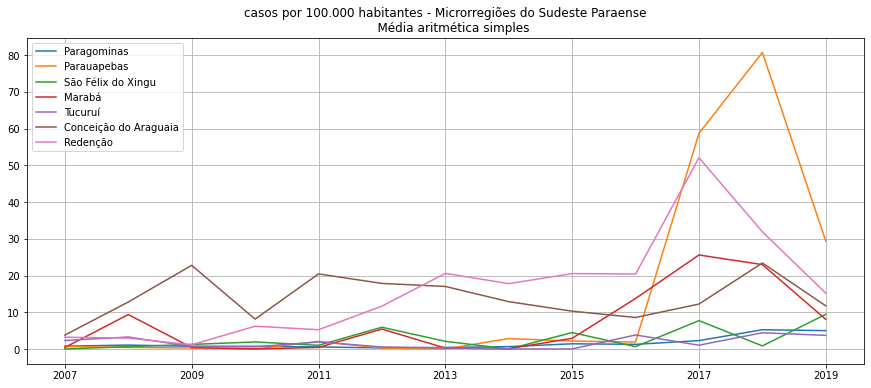

In [6]:
micro_mun = {}
for micro in municipios.loc[municipios.mesorregiao == 'Sudeste Paraense', 'microrregiao']:
    micro_mun.update({micro: municipios.loc[municipios.microrregiao == micro, 'ibge_code'].values})

paragominas = t.loc[micro_mun['Paragominas'], :].mean()
parauapebas = t.loc[micro_mun['Parauapebas'], :].mean()
sao_felix = t.loc[micro_mun['São Félix do Xingu'], :].mean()
maraba = t.loc[micro_mun['Marabá'], :].mean()
tucurui = t.loc[micro_mun['Tucuruí'], :].mean()
conceicao = t.loc[micro_mun['Conceição do Araguaia'], :].mean()
redencao = t.loc[micro_mun['Redenção'], :].mean()

data = pd.concat([paragominas, parauapebas, sao_felix, maraba, tucurui, conceicao, redencao], axis=1)
data.columns = micro_mun.keys()
profile = ProfileReport(data)
profile.to_file("../reports/microrregiões_sudeste_report.html")
data.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Microrregiões do Sudeste Paraense
    Média aritmética simples'''
);

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

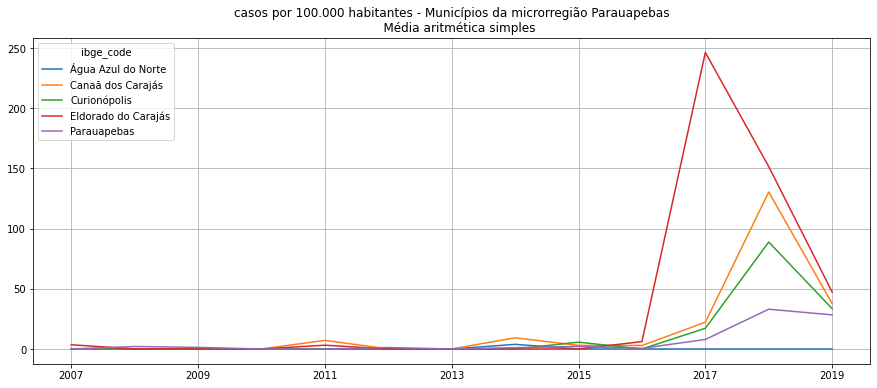

In [7]:
data = t.loc[municipios.loc[municipios.microrregiao == 'Parauapebas', 'ibge_code'], :]
data.index = data.index.map(
    dict(zip(
        municipios.loc[municipios.microrregiao == 'Parauapebas', 'ibge_code'],
        municipios.loc[municipios.microrregiao == 'Parauapebas', 'municipio']
    ))
)
profile = ProfileReport(data.T)
profile.to_file("../reports/municipios_microrregiao_parauapebas_report.html")
data.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios da microrregião Parauapebas
    Média aritmética simples'''
);

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

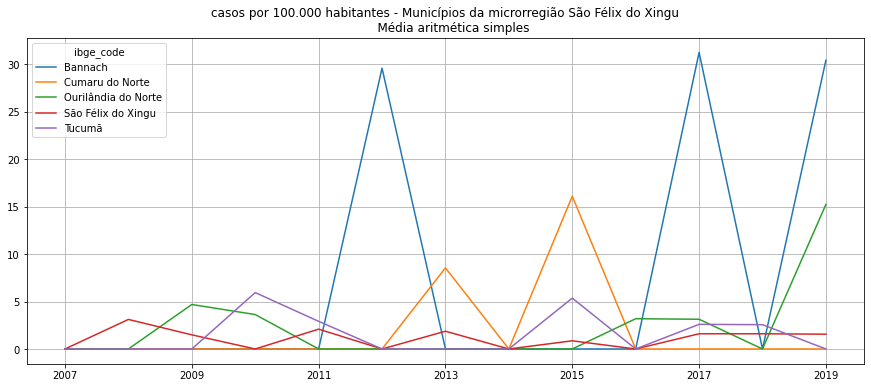

In [8]:
data = t.loc[municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'ibge_code'], :]
data.index = data.index.map(
    dict(zip(
        municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'ibge_code'],
        municipios.loc[municipios.microrregiao == 'São Félix do Xingu', 'municipio']
    ))
)
profile = ProfileReport(data.T)
profile.to_file("../reports/municipios_microrregião_são_félix_report.html")
data.T.plot(
    figsize=(15,6), 
    grid=True, 
    title='''casos por 100.000 habitantes - Municípios da microrregião São Félix do Xingu
    Média aritmética simples'''
);

In [9]:
limitrofes = ['Ourilândia do Norte', 'Água Azul do Norte', 'São Félix do Xingu', 'Tucumã', 'Parauapebas', 'Bannach', 'Cumaru do Norte']
idx = []
for it in limitrofes:
    idx.append(municipios.loc[municipios.municipio == it, :].index.values[0])
limitrofes = municipios.loc[idx, :]
limitrofes = limitrofes.set_index('ibge_code')

ouri_vizinhos = t.loc[limitrofes.index,:].copy()
ouri_vizinhos.index = ouri_vizinhos.index.map(dict(zip(limitrofes.index, limitrofes.municipio)))
ouri_vizinhos = ouri_vizinhos.T
ProfileReport(ouri_vizinhos).to_file("../reports/municipios_limitrofes_ourilandia_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
limitrofes = ['Marabá', 'Curionópolis', 'Canaã dos Carajás', 'Parauapebas', 'Água Azul do Norte', 'São Félix do Xingu']
idx = []
for it in limitrofes:
    idx.append(municipios.loc[municipios.municipio == it, :].index.values[0])
limitrofes = municipios.loc[idx, :]
limitrofes = limitrofes.set_index('ibge_code')

pebas = t.loc[limitrofes.index,:].copy()
pebas.index = pebas.index.map(dict(zip(limitrofes.index, limitrofes.municipio)))
pebas = pebas.T
ProfileReport(ouri_vizinhos).to_file("../reports/municipios_limitrofes_parauapebas_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]